In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [3]:
XandY = pd.read_csv('X_and_Y_7-Day Lag.csv', dtype = float)

In [30]:
XandY

,Shanghai,Shanghai 2,Shanghai 2.1,Shanghai 2.2,Shanghai 2.3,Shanghai 2.4,Shanghai 2.5,DOW,DOW.1,DOW.2,...,DOW.5,DOW.6,Y,Y.1,Y.2,Y.3,Y.4,Y.5,Y.6,Y.7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104.39,NaN,NaN,NaN,NaN,NaN,NaN,921.340027,NaN,NaN,...,NaN,NaN,5.2400,5.2400,NaN,NaN,NaN,NaN,NaN,NaN
2,109.13,104.39,NaN,NaN,NaN,NaN,NaN,925.500000,921.340027,NaN,...,NaN,NaN,5.2400,5.2400,5.2400,NaN,NaN,NaN,NaN,NaN
3,114.55,109.13,104.39,NaN,NaN,NaN,NaN,921.729980,925.500000,921.340027,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,NaN,NaN,NaN,NaN
4,120.25,114.55,109.13,104.39,NaN,NaN,NaN,925.690002,921.729980,925.500000,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,NaN,NaN
5,125.27,120.25,114.55,109.13,104.39,NaN,NaN,920.409973,925.690002,921.729980,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,NaN
6,125.28,125.27,120.25,114.55,109.13,104.39,NaN,920.369995,920.409973,925.690002,...,921.340027,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,NaN
7,126.45,125.28,125.27,120.25,114.55,109.13,104.39,920.609985,920.369995,920.409973,...,925.500000,921.340027,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
8,127.61,126.45,125.28,125.27,120.25,114.55,109.13,914.890015,920.609985,920.369995,...,921.729980,925.500000,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
9,128.84,127.61,126.45,125.28,125.27,120.25,114.55,907.070007,914.890015,920.609985,...,925.690002,921.729980,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400


In [49]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,0:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    
    X = (np.array(XandY.iloc[(endLoc):(6886),0:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
SSE:  0.18649125017935883


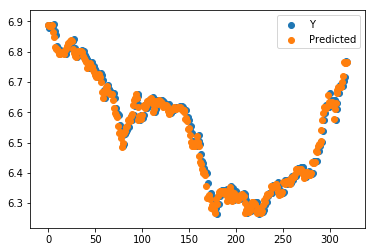

In [50]:
linRegress(XandY)